In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import img_as_float, exposure
from skimage.io import imread, imread_collection
from skimage.feature import hog
from skimage.transform import ProjectiveTransform
from skimage.feature import corner_harris, corner_peaks

from image import get_patch
from tools import plot_images, plot_with_keypoints, invert_coords
from tools import trim_coords_to_shape

%matplotlib inline

(640, 800)


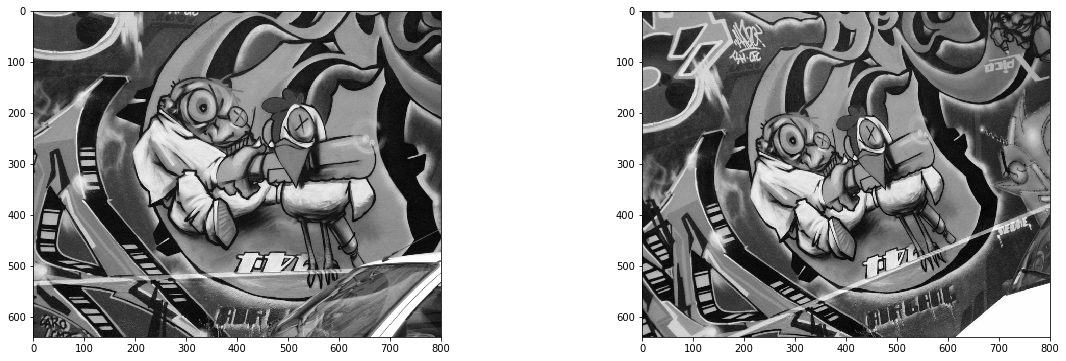

In [2]:
H1to2 = np.loadtxt('images/viewpoint-1/H1to2p')
H1to3 = np.loadtxt('images/viewpoint-1/H1to3p')
H1to4 = np.loadtxt('images/viewpoint-1/H1to4p')
H1to5 = np.loadtxt('images/viewpoint-1/H1to5p')
H1to6 = np.loadtxt('images/viewpoint-1/H1to6p')

img1 = imread('images/viewpoint-1/img1.ppm', as_grey=True)
img2 = imread('images/viewpoint-1/img2.ppm', as_grey=True)
plot_images([img1, img2])

print(img1.shape)

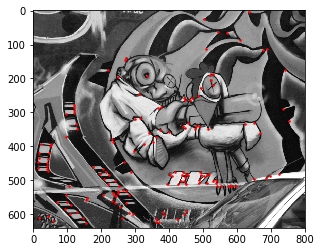

In [3]:
coords = corner_peaks(corner_harris(img1), min_distance=5)
coords = invert_coords(coords)
plot_with_keypoints(img1, coords)

[[462.36580201  36.69475395]
 [373.65118225  77.62202651]
 [415.94240347 102.16599885]
 [434.18946024  98.42231255]
 [468.60102782 108.80465942]
 [404.01893278 150.79975864]
 [530.03724556 118.08936809]
 [522.77656951 120.93510196]
 [233.03486082 221.77667491]
 [232.26725989 229.81530394]
 [200.68872558 266.17787825]
 [583.43515358 159.51227292]
 [439.27640305 210.36928922]
 [434.80498909 213.51689461]
 [296.4988099  257.69593825]
 [230.82687081 277.42994045]
 [440.17690672 227.0211005 ]
 [448.27843568 236.90688751]
 [425.85404594 252.90385198]
 [294.22787292 309.16367593]
 [427.47615788 274.26374652]
 [397.3506996  288.05817988]
 [416.36240682 284.26548787]
 [401.63069547 293.48575932]
 [413.42431577 289.92891451]
 [150.13390597 384.63255008]
 [151.98779534 390.19454516]
 [356.22222373 327.58843459]
 [349.53029892 332.56603539]
 [611.98328029 253.75525988]
 [155.07838806 399.46686837]
 [158.69376078 407.55535757]
 [138.3923872  415.92699124]
 [318.64772006 371.62107497]
 [306.5397649 

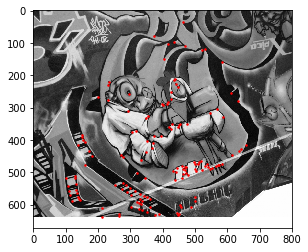

In [9]:
trans = ProjectiveTransform(H1to2)
coords2 = trim_coords_to_shape(img2.shape, trans(coords))
print(coords2)
plot_with_keypoints(img2, coords2)

In [5]:
patch = get_patch(img1, test_coords[0], size=(32, 32))
plt.imshow(patch, cmap='gray')

NameError: name 'test_coords' is not defined

[462.36580201  36.69475395]


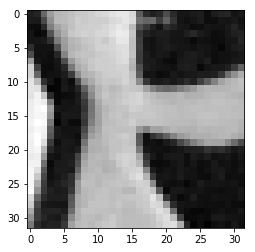

In [6]:
print(coords2[0])
patch2 = get_patch(img2, [coords2[0, 1], coords2[0, 0]], size=(32, 32))
plt.imshow(patch2, cmap='gray')

In [160]:
nbins = 10
hist1, _ = exposure.histogram(patch, nbins=nbins)
hist2, _ = exposure.histogram(patch2, nbins=nbins)

np.abs(hist1 - hist2).sum() / (nbins * 256)

0.05625

In [ ]:
fd, hog_image = hog(patch1)